## 1. Imports and Configuration

In [1]:
import sys
from pathlib import Path
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

# Add root directory to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Import Open-Meteo Archive synchronous adapter
from scripts.api.services.openmeteo_archive.openmeteo_archive_sync_adapter import OpenMeteoArchiveSyncAdapter

# Configure logging
logger.remove()
logger.add(sys.stdout, level="INFO")

# Configure plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Imports completed")

Imports completed


## 2. Initialize Open-Meteo Archive Client

In [2]:
# Create synchronous adapter (with local cache)
archive_adapter = OpenMeteoArchiveSyncAdapter(cache_dir=".cache")

# Check API information
info = archive_adapter.get_info()
print("\nOpen-Meteo Archive API Information:")
for key, value in info.items():
    print(f"  {key}: {value}")

2025-11-27 17:29:44.049 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_sync_adapter:__init__:67 - OpenMeteoArchiveSyncAdapter initialized (Local cache, 1990 to today-30d)

Open-Meteo Archive API Information:
  api: Open-Meteo Archive
  url: https://archive-api.open-meteo.com/v1/archive
  coverage: Global
  period: Padrão EVAonline: 1990-01-01 até 2025-11-25
  resolution: Diária
  license: CC BY 4.0
  attribution: Weather data by Open-Meteo.com (CC BY 4.0)
  cache_ttl: 24 horas (dados históricos estáveis)

Open-Meteo Archive API Information:
  api: Open-Meteo Archive
  url: https://archive-api.open-meteo.com/v1/archive
  coverage: Global
  period: Padrão EVAonline: 1990-01-01 até 2025-11-25
  resolution: Diária
  license: CC BY 4.0
  attribution: Weather data by Open-Meteo.com (CC BY 4.0)
  cache_ttl: 24 horas (dados históricos estáveis)


## 3. Download Real Data - Brasília/DF

Let's download historical climate data for **Brasília/DF**, Brazil's capital.

**Coordinates**: -15.7939°S, -47.8828°W  
**Period**: January 2000 (1 complete month)

In [3]:
# Define location: Brasília/DF
lat = -15.7939
lon = -47.8828
location_name = "Brasília/DF"

# Define period: January 2000
start_date = datetime(2000, 1, 1)
end_date = datetime(2000, 1, 31)

print(f"Location: {location_name}")
print(f"Period: {start_date.date()} to {end_date.date()}")
print(f"Coordinates: {lat:.4f}°, {lon:.4f}°")

Location: Brasília/DF
Period: 2000-01-01 to 2000-01-31
Coordinates: -15.7939°, -47.8828°


In [4]:
# Download data
print("\nDownloading data from Open-Meteo Archive...\n")

archive_data = archive_adapter.get_daily_data_sync(
    lat=lat,
    lon=lon,
    start_date=start_date,
    end_date=end_date
)

print(f"\nData downloaded: {len(archive_data)} records")



2025-11-27 17:29:44.069 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_client:__init__:105 - OpenMeteoArchiveClient initialized (Local cache, 1990-present)
2025-11-27 17:29:44.072 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_client:get_climate_data:175 - ⚠️ Cache MISS: Archive API 2000-01-01 to 2000-01-31 | (-15.7939, -47.8828)
2025-11-27 17:29:44.072 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_client:get_climate_data:175 - ⚠️ Cache MISS: Archive API 2000-01-01 to 2000-01-31 | (-15.7939, -47.8828)
2025-11-27 17:29:44.082 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_client:get_climate_data:280 - ✅ Archive: 31 days | Elevation: 1092m
2025-11-27 17:29:44.084 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_sync_adapter:_async_get_data:163 - Archive: obtidos 31 registros diários para (-15.7939, -47.8828) | 10 variáveis climáticas

Data downloaded: 31 records
2025-11-27 

## 4. Convert to DataFrame and Explore

In [5]:
# Convert to DataFrame
df = pd.DataFrame(archive_data)

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Display first rows
print("\nFirst 5 rows of data:")
display(df.head())

# Check available columns
print("\nAvailable columns:")
print(df.columns.tolist())


First 5 rows of data:


,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum,et0_fao_evapotranspiration,shortwave_radiation_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,wind_speed_10m_mean,wind_speed_2m_mean
0,2000-01-01,19.661251,23.367500,18.317501,11.200000,2.075677,10.930000,91.480659,96.304527,75.324165,3.451213,2.581507
1,2000-01-02,19.161249,21.367500,18.117500,16.400000,1.548066,8.320000,92.907867,98.441803,83.555565,4.704238,3.518770
2,2000-01-03,18.996668,20.567501,17.767500,17.500000,1.480824,7.310000,90.704865,96.899155,82.909676,5.156174,3.856818
3,2000-01-04,20.398748,24.717501,17.967501,5.599999,3.295222,17.580000,83.478668,94.800499,67.406380,4.204436,3.144918
4,2000-01-05,20.980000,26.017500,18.317501,6.200000,3.510298,17.690001,82.672195,95.697182,56.552402,1.814202,1.357023



Available columns:
['date', 'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum', 'et0_fao_evapotranspiration', 'shortwave_radiation_sum', 'relative_humidity_2m_mean', 'relative_humidity_2m_max', 'relative_humidity_2m_min', 'wind_speed_10m_mean', 'wind_speed_2m_mean']


In [6]:
# Descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum,et0_fao_evapotranspiration,shortwave_radiation_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,wind_speed_10m_mean,wind_speed_2m_mean
count,31,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2000-01-16 00:00:00,21.596734,25.999759,18.133630,6.364516,3.910314,19.924516,80.388991,95.814909,59.924949,2.413244,1.805106
min,2000-01-01 00:00:00,18.996668,20.567501,16.367500,0.000000,1.480824,7.310000,64.786736,87.220413,35.079536,1.163873,0.870577
25%,2000-01-08 12:00:00,20.847709,24.992500,17.792500,1.500000,3.243009,16.800000,76.888828,94.456959,55.758734,1.738945,1.300731
50%,2000-01-16 00:00:00,21.417501,26.017500,18.317501,4.900000,3.971973,20.129999,81.765862,96.304527,59.103451,2.018650,1.509950
75%,2000-01-23 12:00:00,22.206041,27.117500,18.592501,8.750000,4.768918,24.525000,85.349812,98.448002,66.302929,2.991496,2.237639
max,2000-01-31 00:00:00,24.227919,29.717501,20.017500,28.499998,5.693803,27.730000,92.907867,99.684952,83.555565,5.156174,3.856818
std,NaN,1.285641,1.999273,0.825266,6.839520,1.150552,5.586525,7.977355,3.249011,11.979582,1.016538,0.760370


## 5. Visualizations

### 5.1 Temperatures (Maximum, Minimum, Mean)

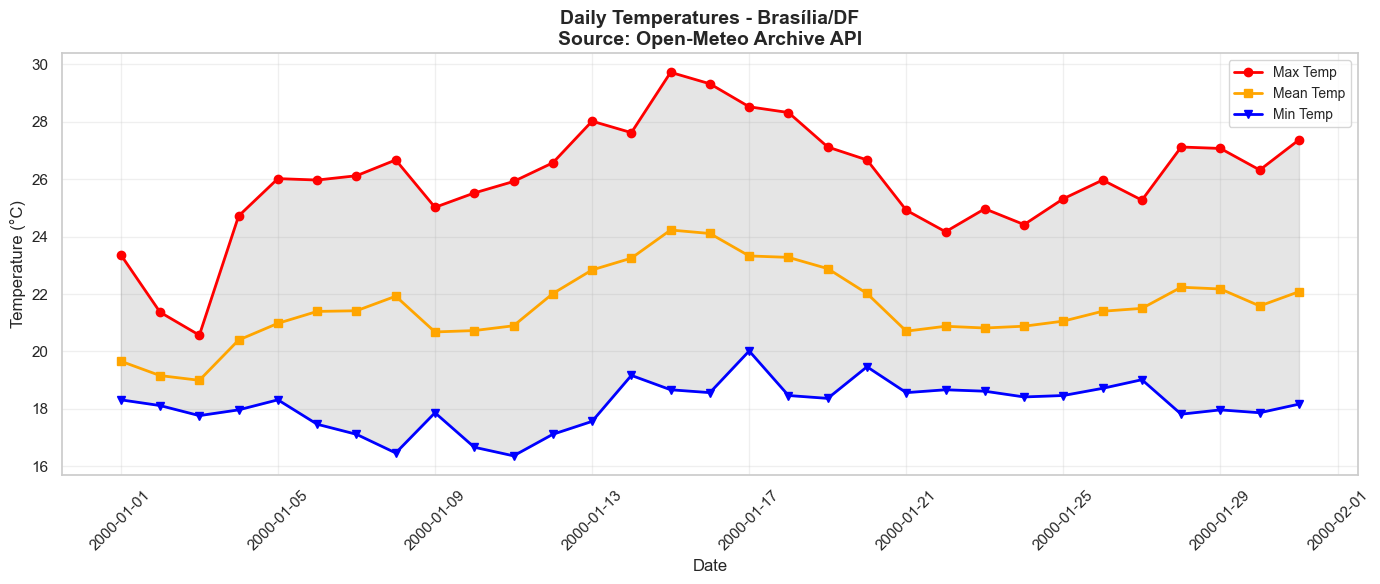

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['date'], df['temperature_2m_max'], label='Max Temp', color='red', linewidth=2, marker='o')
ax.plot(df['date'], df['temperature_2m_mean'], label='Mean Temp', color='orange', linewidth=2, marker='s')
ax.plot(df['date'], df['temperature_2m_min'], label='Min Temp', color='blue', linewidth=2, marker='v')

ax.fill_between(df['date'], df['temperature_2m_min'], df['temperature_2m_max'], alpha=0.2, color='gray')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title(f'Daily Temperatures - {location_name}\nSource: Open-Meteo Archive API', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.2 Relative Humidity (Maximum, Minimum, Mean)

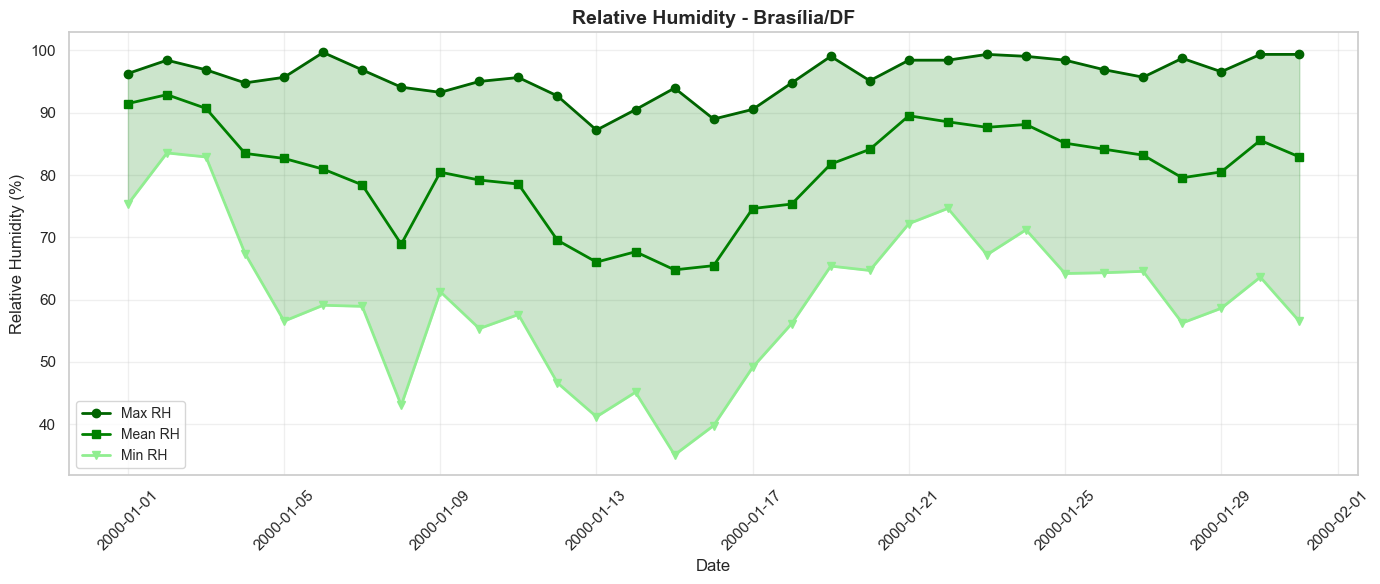

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['date'], df['relative_humidity_2m_max'], label='Max RH', color='darkgreen', linewidth=2, marker='o')
ax.plot(df['date'], df['relative_humidity_2m_mean'], label='Mean RH', color='green', linewidth=2, marker='s')
ax.plot(df['date'], df['relative_humidity_2m_min'], label='Min RH', color='lightgreen', linewidth=2, marker='v')

ax.fill_between(df['date'], df['relative_humidity_2m_min'], df['relative_humidity_2m_max'], alpha=0.2, color='green')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Relative Humidity (%)', fontsize=12)
ax.set_title(f'Relative Humidity - {location_name}', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.3 Precipitation and ET0

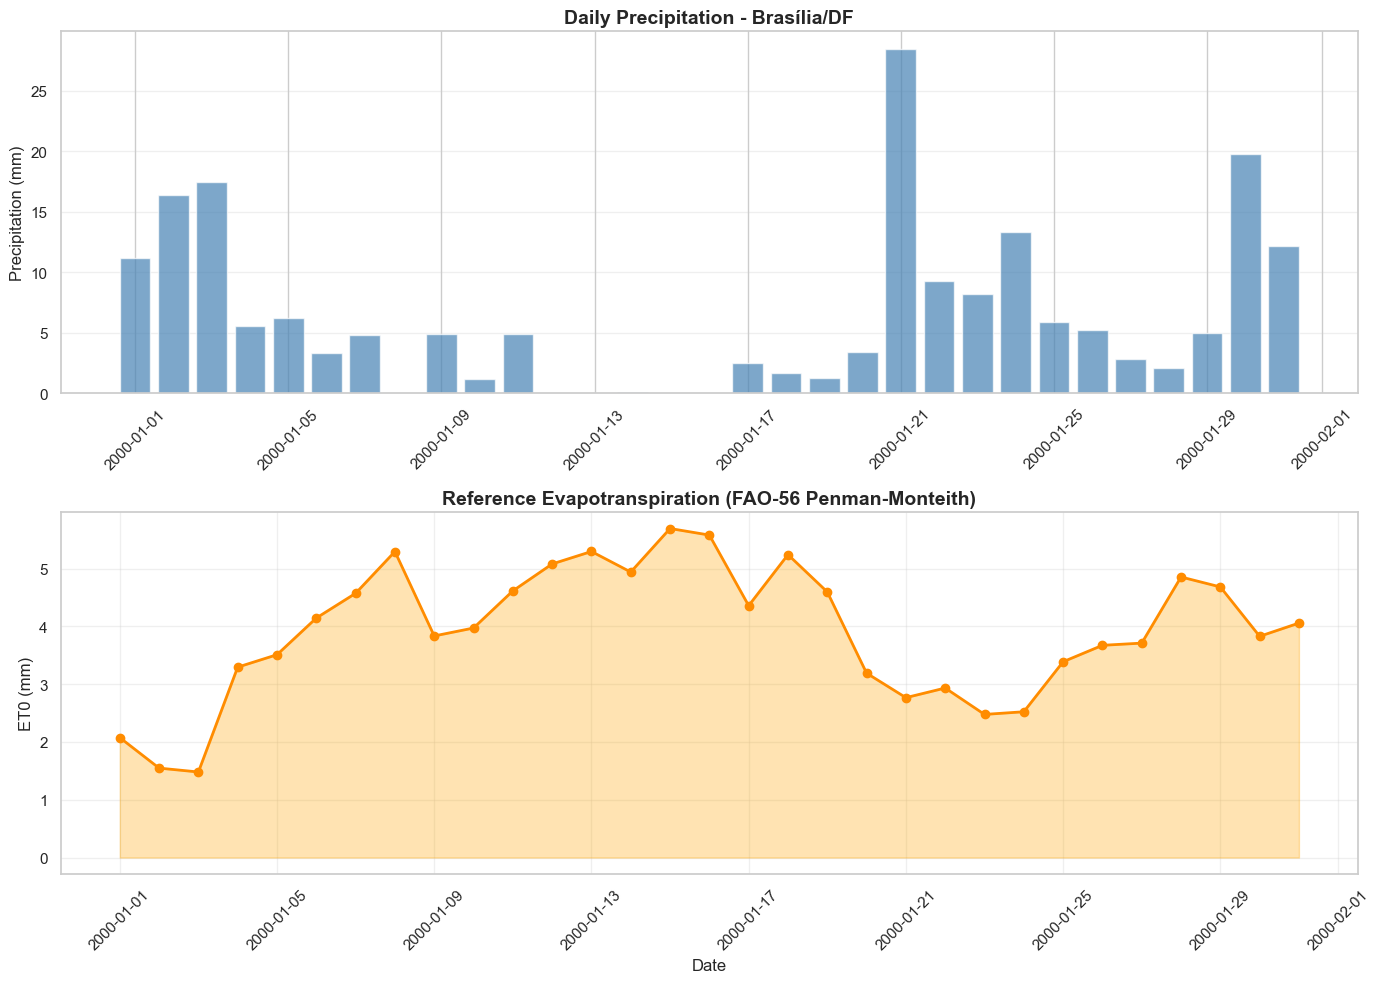

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Precipitation
ax1.bar(df['date'], df['precipitation_sum'], color='steelblue', alpha=0.7)
ax1.set_ylabel('Precipitation (mm)', fontsize=12)
ax1.set_title(f'Daily Precipitation - {location_name}', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# ET0 (Reference Evapotranspiration)
ax2.plot(df['date'], df['et0_fao_evapotranspiration'], color='darkorange', linewidth=2, marker='o')
ax2.fill_between(df['date'], df['et0_fao_evapotranspiration'], alpha=0.3, color='orange')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('ET0 (mm)', fontsize=12)
ax2.set_title('Reference Evapotranspiration (FAO-56 Penman-Monteith)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()

### 5.4 Solar Radiation and Wind Speed

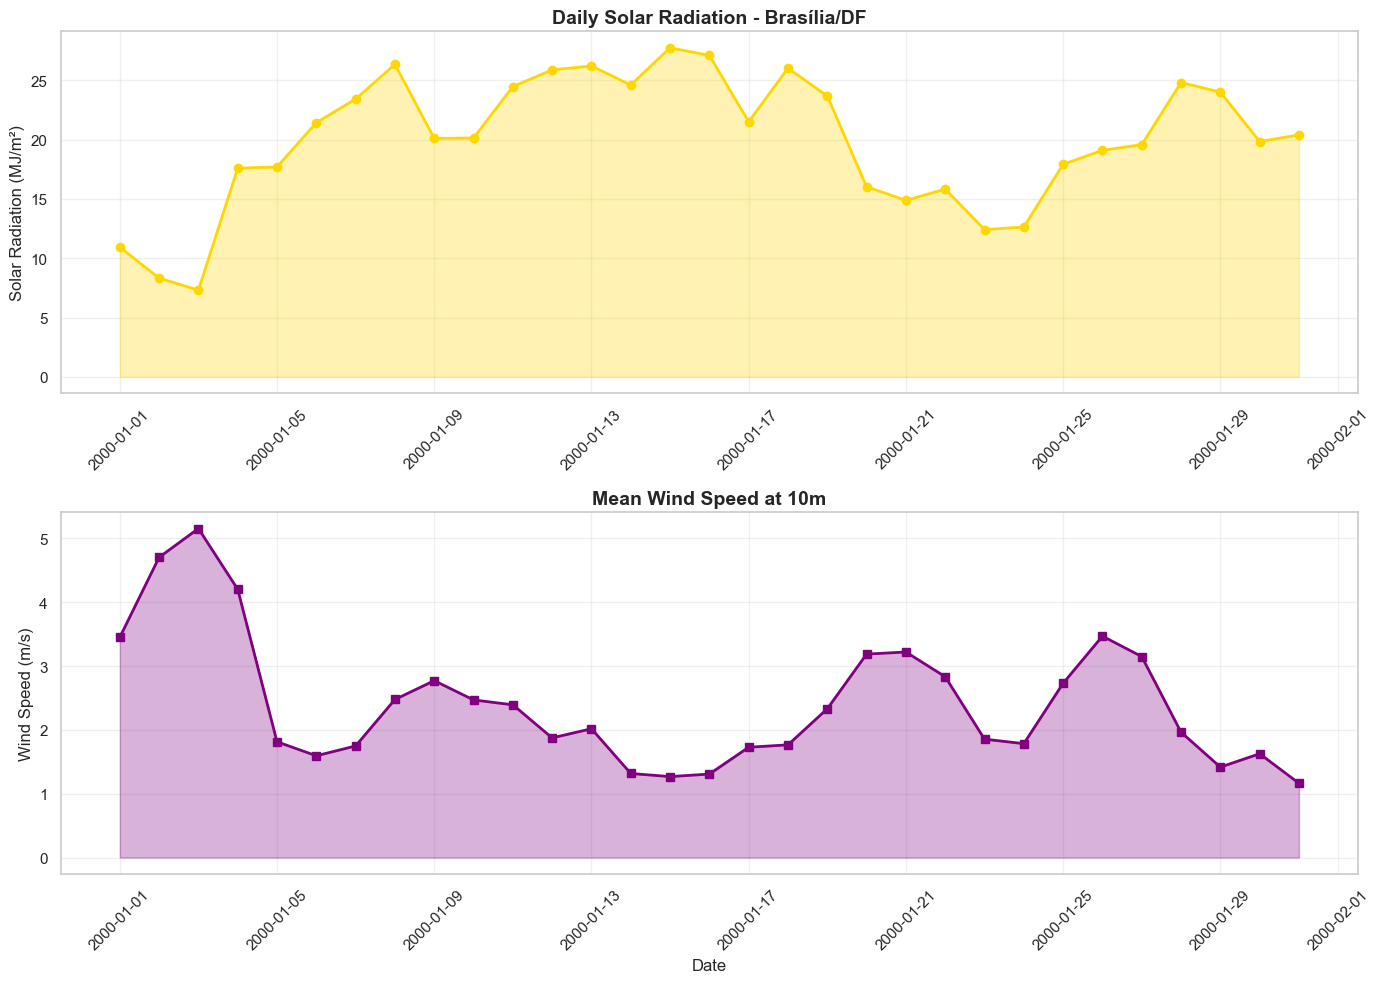

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Solar Radiation
ax1.plot(df['date'], df['shortwave_radiation_sum'], color='gold', linewidth=2, marker='o')
ax1.fill_between(df['date'], df['shortwave_radiation_sum'], alpha=0.3, color='gold')
ax1.set_ylabel('Solar Radiation (MJ/m²)', fontsize=12)
ax1.set_title(f'Daily Solar Radiation - {location_name}', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Wind Speed
ax2.plot(df['date'], df['wind_speed_10m_mean'], color='purple', linewidth=2, marker='s')
ax2.fill_between(df['date'], df['wind_speed_10m_mean'], alpha=0.3, color='purple')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Wind Speed (m/s)', fontsize=12)
ax2.set_title('Mean Wind Speed at 10m', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()

## 6. Health Check

In [11]:
import nest_asyncio
nest_asyncio.apply()

# Check API availability
is_healthy = archive_adapter.health_check_sync()

if is_healthy:
    print("Open-Meteo Archive API is working correctly")
else:
    print("Open-Meteo Archive API is not accessible")

2025-11-27 17:29:45.335 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_client:__init__:105 - OpenMeteoArchiveClient initialized (Local cache, 1990-present)
2025-11-27 17:29:45.336 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_client:get_climate_data:175 - ⚠️ Cache MISS: Archive API 1990-01-01 to 1990-01-01 | (-15.7939, -47.8828)
2025-11-27 17:29:45.336 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_client:get_climate_data:175 - ⚠️ Cache MISS: Archive API 1990-01-01 to 1990-01-01 | (-15.7939, -47.8828)
2025-11-27 17:29:46.707 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_client:get_climate_data:280 - ✅ Archive: 1 days | Elevation: 1092m
Open-Meteo Archive API is working correctly
2025-11-27 17:29:46.707 | INFO     | scripts.api.services.openmeteo_archive.openmeteo_archive_client:get_climate_data:280 - ✅ Archive: 1 days | Elevation: 1092m
Open-Meteo Archive API is working correctly


## 7. Save Data

In [12]:
# Save DataFrame as CSV
output_file = project_root / "data" / "csv" / "openmeteo_archive_brasilia_demo.csv"
output_file.parent.mkdir(parents=True, exist_ok=True)

df.to_csv(output_file, index=False)
print(f"\nData saved to: {output_file}")
print(f"Total records: {len(df)}")


Data saved to: c:\Users\User\OneDrive\Documentos\GitHub\EVAONLINE\EVAonline_validation_v1.0.0\data\csv\openmeteo_archive_brasilia_demo.csv
Total records: 31


---

## References

**Open-Meteo Archive API**
- Website: https://open-meteo.com/
- API Documentation: https://open-meteo.com/en/docs/historical-weather-api
- Citation: Zippenfenig, P. (2023). Open-Meteo.com Weather API [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.14582479

**License**: CC BY 4.0 (attribution required)

---